In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [7]:
# URL of the Seeds dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"

# Column names as per UCI documentation
columns = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove', 'class']

# Load the dataset
df = pd.read_csv(url, sep="\s+", header=None, names=columns)
X = df.drop(columns=['class']) 


<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\mietp\AppData\Local\Temp\ipykernel_11272\1835697205.py:8: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(url, sep="\s+", header=None, names=columns)


In [12]:
# Preprocessing combinations
def preprocess(X, methods):
    X_new = X.copy()
    if 'transform' in methods:
        X_new = PowerTransformer().fit_transform(X_new)
    if 'normalize' in methods:
        X_new = StandardScaler().fit_transform(X_new)
    if 'pca' in methods:
        X_new = PCA(n_components=2).fit_transform(X_new)
    return X_new

preprocessing_configs = {
    'No Processing': [],
    'Normalization': ['normalize'],
    'Transform': ['transform'],
    'PCA': ['pca'],
    'Transform+Norm': ['transform', 'normalize'],
    'T+N+PCA': ['transform', 'normalize', 'pca']
}

# Clustering methods
clustering_algorithms = {
    'KMeans': lambda n: KMeans(n_clusters=n, random_state=42),
    'Hierarchical': lambda n: AgglomerativeClustering(n_clusters=n),
    'MeanShift': lambda _: MeanShift()
}

cluster_sizes = [3, 4, 5]  # For MeanShift, size is ignored

results = []

for algo_name, algo_func in clustering_algorithms.items():
    for prep_name, prep_methods in preprocessing_configs.items():
        X_prep = preprocess(X, prep_methods)
        for c in cluster_sizes:
            if algo_name == 'MeanShift' and c != 3:
                continue  # Avoid re-running MeanShift for same prep

            model = algo_func(c)
            labels = model.fit_predict(X_prep)

            silhouette = silhouette_score(X_prep, labels)
            ch_score = calinski_harabasz_score(X_prep, labels)
            db_score = davies_bouldin_score(X_prep, labels)

            results.append({
                'Algorithm': algo_name,
                'Preprocessing': prep_name,
                'Clusters': c,
                'Silhouette': silhouette,
                'Calinski-Harabasz': ch_score,
                'Davies-Bouldin': db_score
            })

# Convert to DataFrame
df = pd.DataFrame(results)
df



,Algorithm,Preprocessing,Clusters,Silhouette,Calinski-Harabasz,Davies-Bouldin
0,KMeans,No Processing,3,0.471934,375.804961,0.753314
1,KMeans,No Processing,4,0.392515,325.585387,0.862427
2,KMeans,No Processing,5,0.367368,309.722928,0.879355
3,KMeans,Normalization,3,0.402437,249.654974,0.922088
4,KMeans,Normalization,4,0.329197,202.930659,1.062899
5,KMeans,Normalization,5,0.266052,172.806643,1.287628
6,KMeans,Transform,3,0.402672,235.855993,0.959938
7,KMeans,Transform,4,0.351997,190.856777,1.198070
8,KMeans,Transform,5,0.306053,164.260032,1.217904
9,KMeans,PCA,3,0.480214,387.014334,0.736930


# Barplots

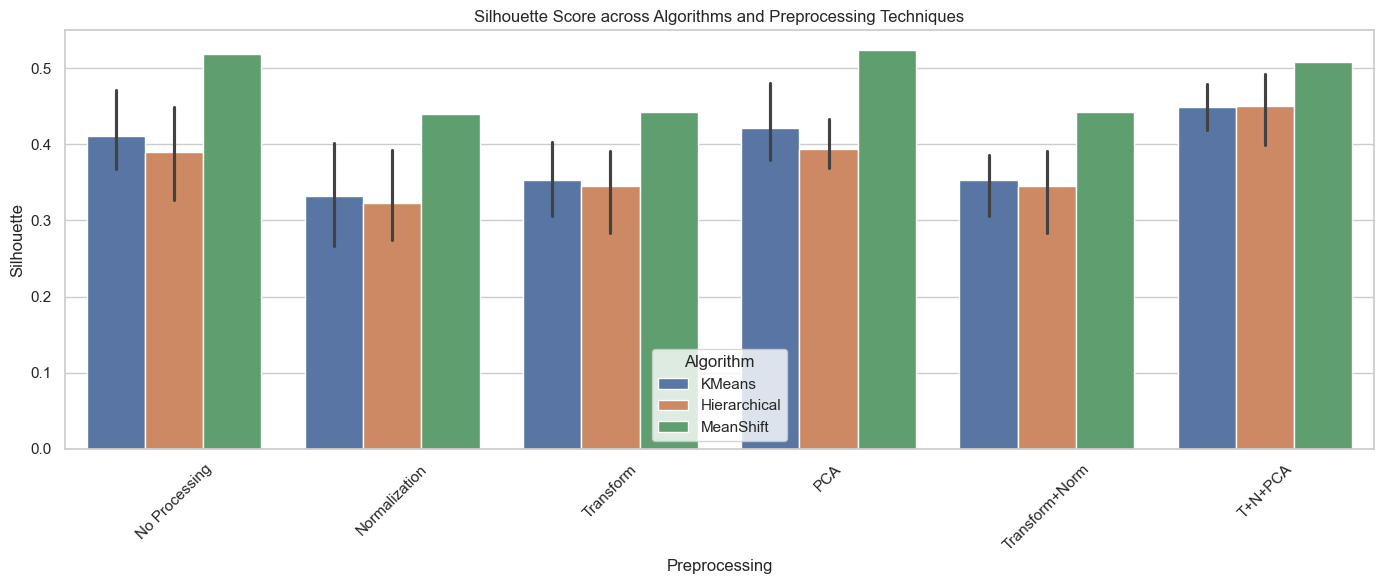

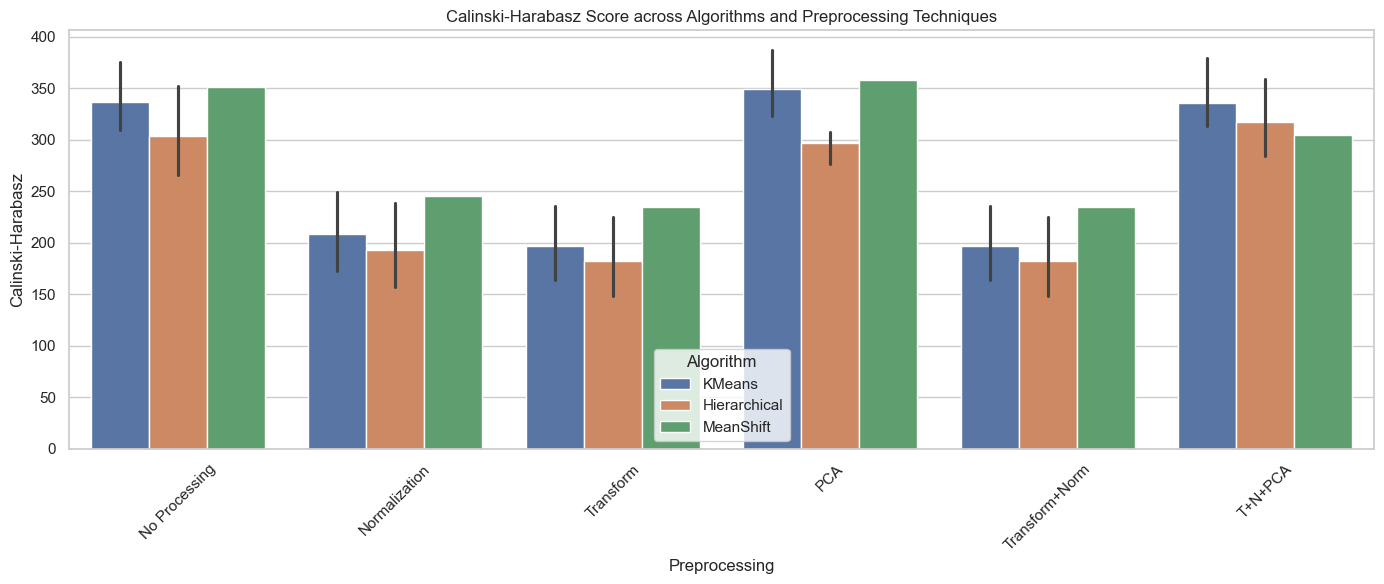

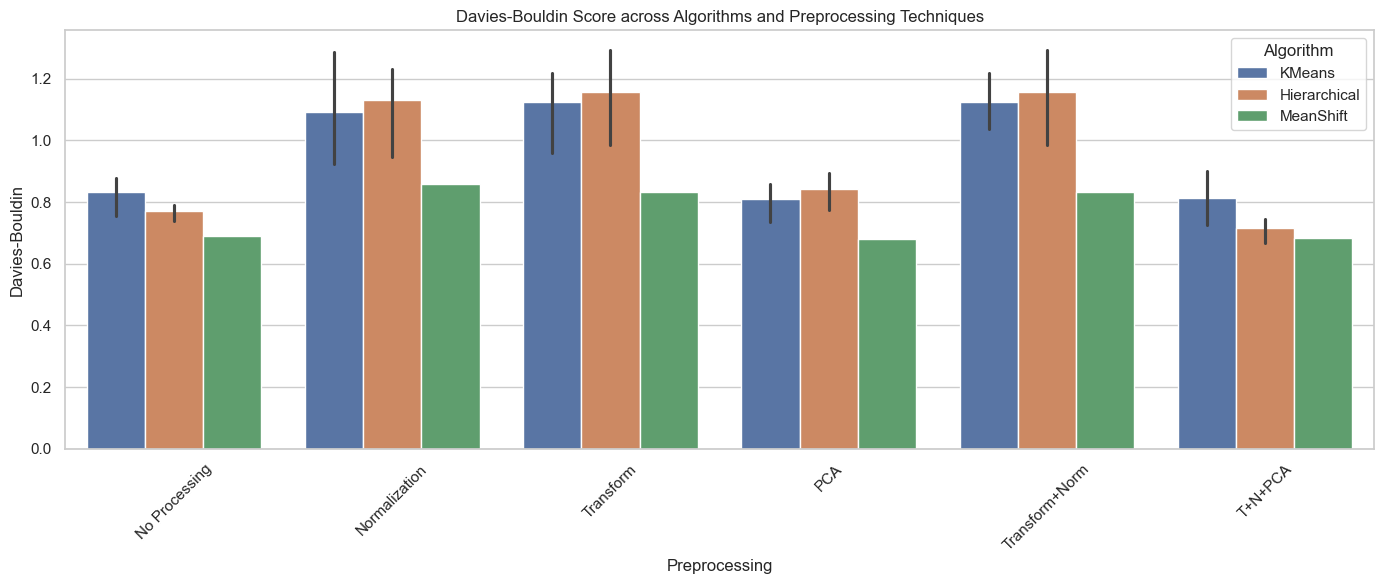

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
metrics = ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']

for metric in metrics:
    plt.figure(figsize=(14, 6))
    sns.barplot(x='Preprocessing', y=metric, hue='Algorithm', data=df)
    plt.title(f'{metric} Score across Algorithms and Preprocessing Techniques')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Heatmaps

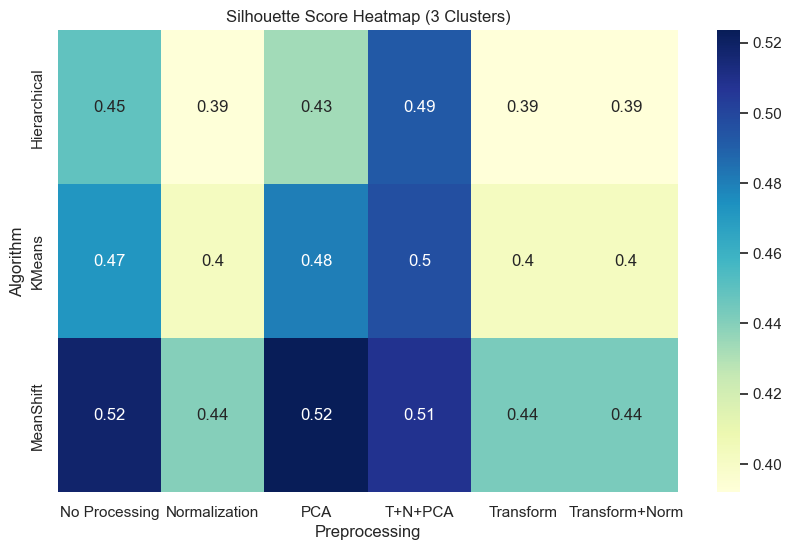

In [15]:
pivot_silhouette = df[df['Clusters'] == 3].pivot(index="Algorithm", columns="Preprocessing", values="Silhouette")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_silhouette, annot=True, cmap="YlGnBu")
plt.title("Silhouette Score Heatmap (3 Clusters)")
plt.show()


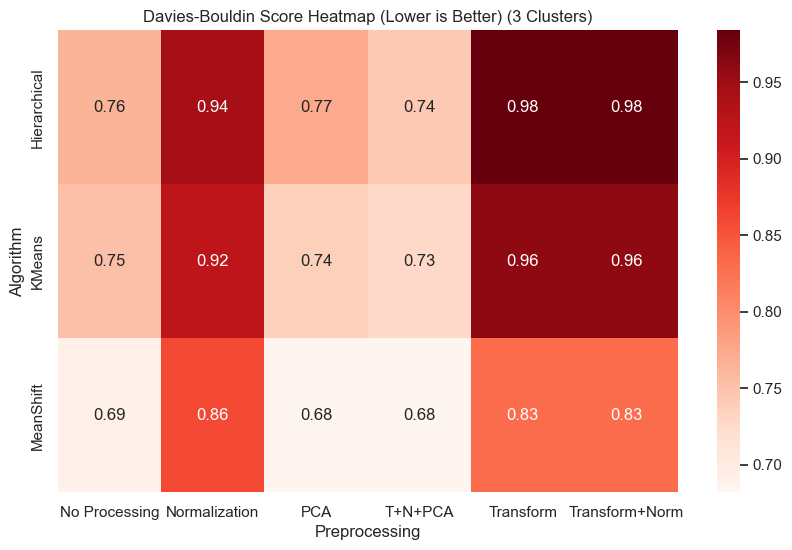

In [16]:
pivot_db = df[df['Clusters'] == 3].pivot(index="Algorithm", columns="Preprocessing", values="Davies-Bouldin")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_db, annot=True, cmap="Reds", fmt=".2f")
plt.title("Davies-Bouldin Score Heatmap (Lower is Better) (3 Clusters)")
plt.show()


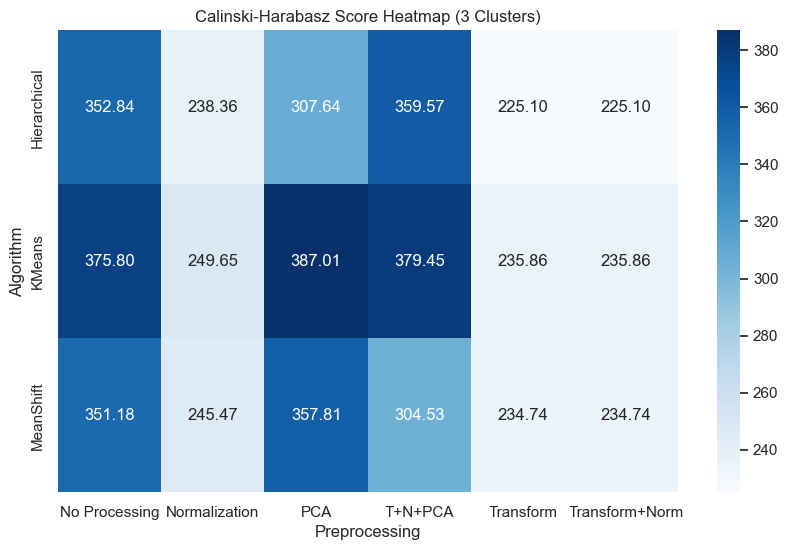

In [17]:
pivot_ch = df[df['Clusters'] == 3].pivot(index="Algorithm", columns="Preprocessing", values="Calinski-Harabasz")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_ch, annot=True, cmap="Blues", fmt=".2f")
plt.title("Calinski-Harabasz Score Heatmap (3 Clusters)")
plt.show()
